In [53]:
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict

loaded


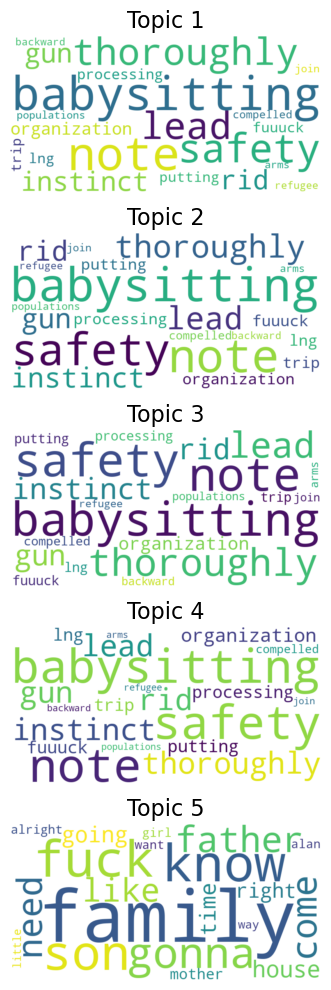

In [57]:
# Load the text file
file_path = '/Users/ql/Desktop/IS278 data/7_cleaned.txt'
with open(file_path, 'r', encoding='utf-8') as file:
    raw_text = file.read()
print('loaded')

# Text Preprocessing
# Convert text to lowercase
text = raw_text.lower()

# Remove non-alphabetic characters and extra spaces
text = re.sub(r'[^a-z\s]', ' ', text)
text = re.sub(r'\s+', ' ', text)

# Simple tokenization using split
tokens = text.split()

# Define a manual list of common stopwords
common_stop_words = {"i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", 
                     "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", 
                     "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", 
                     "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", 
                     "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", 
                     "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", 
                     "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", 
                     "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", 
                     "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", 
                     "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"}

# Remove stopwords using the manually defined list
filtered_tokens = [word for word in tokens if word not in common_stop_words and len(word) > 2]

# Prepare text for LDA with character names included
filtered_text_with_names = ' '.join(filtered_tokens)

# Define character names to ensure they are part of the vocabulary
character_names = ["ethan", "mia", "zoe", "lucas", "jack", "marguerite", "andre", "pete", "clancy", "eveline"]

# Use CountVectorizer to create a document-term matrix, including character names in the vocabulary
vectorizer = CountVectorizer(max_df=1.0, min_df=1, stop_words='english', vocabulary=list(set(character_names + filtered_tokens)))
dtm = vectorizer.fit_transform([filtered_text_with_names])

# Fit LDA model using sklearn
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(dtm)

# Get the topics and their top words
words = vectorizer.get_feature_names_out()
topics_summary_with_names = []
for idx, topic in enumerate(lda.components_):
    top_words = [words[i] for i in topic.argsort()[-10:]]
    topics_summary_with_names.append(f"Topic {idx + 1}: " + ", ".join(top_words))

# Generate Word Cloud for each topic, excluding character names from visualization
filtered_tokens_no_names = [word for word in filtered_tokens if word not in character_names]
filtered_text_no_names = ' '.join(filtered_tokens_no_names)
dtm_no_names = vectorizer.fit_transform([filtered_text_no_names])

# Get the updated topics without character names
lda_no_names = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_no_names.fit(dtm_no_names)
words_no_names = vectorizer.get_feature_names_out()

fig, axes = plt.subplots(5, 1, figsize=(25, 10), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    topic_words = {words_no_names[j]: lda_no_names.components_[i][j] for j in lda_no_names.components_[i].argsort()[-20:]}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(f'Topic {i+1}', fontsize=16)

plt.tight_layout()
plt.show()

In [61]:
for topic_summary in topics_summary_with_names:
    print(topic_summary)

Topic 1: putting, trip, lng, fuuuck, compelled, populations, arms, join, backward, refugee
Topic 2: putting, trip, lng, fuuuck, compelled, populations, arms, join, backward, refugee
Topic 3: putting, trip, lng, fuuuck, compelled, populations, arms, join, backward, refugee
Topic 4: putting, trip, lng, fuuuck, compelled, populations, arms, join, backward, refugee
Topic 5: come, gonna, son, fuck, know, zoe, eveline, family, mia, ethan


In [63]:
# Analyze character contribution to Topic 5 using original tokens (including character names)
character_contributions = defaultdict(float)
topic_5 = lda.components_[4]
for word, value in zip(words, topic_5):
    if word in character_names:
        character_contributions[word] += value

# Display character contributions to Topic 5
print("\nCharacter Contributions to Topic 5:")
if character_contributions:
    sorted_contributions = sorted(character_contributions.items(), key=lambda x: x[1], reverse=True)
    for character, contribution in sorted_contributions:
        print(f"{character}: {contribution:.4f}")

    # Display the character with the highest contribution
    most_contributing_character, highest_contribution = sorted_contributions[0]
    print(f"\nCharacter with the highest contribution to Topic 5: {most_contributing_character} ({highest_contribution:.4f})")
else:
    print("No character contributions found for Topic 5.")


Character Contributions to Topic 5:
ethan: 175.2000
mia: 118.2000
eveline: 59.2000
zoe: 47.2000
andre: 22.2000
pete: 19.2000
jack: 11.2000
lucas: 11.2000
clancy: 10.2000
marguerite: 6.2000

Character with the highest contribution to Topic 5: ethan (175.2000)
